In [1]:
import pandas as pd
import numpy as np

In [5]:
d = pd.read_csv('D:/B3_Lokal-Datensatzpaket/CSV/MiD2017_Lokal_Personen.csv', sep=';', usecols = ['H_ID_Lok', 'P_ID', 'P_GEW', 'P_HOCH', 'vpedrad', 'HP_SEX', 'alter_gr', 'taet', 'P_BIL', 'hhgr_gr2', 'oek_status', 'GITTER_500m', 'GITTER_1km', 'GITTER_5km', 'PRAEZISION', 'P_FKARTE', 'P_STKFZ'])
#d

In [7]:
#edsc stats before data processing
#print(d['Raumtyp'].value_counts(normalize=True)) not available before data processing
print(d['oek_status'].value_counts(normalize=True))
print(d['taet'].value_counts(normalize=True))
print(d['hhgr_gr2'].value_counts(normalize=True))
print(d['HP_SEX'].value_counts(normalize=True))
print(d['P_BIL'].value_counts(normalize=True))
print(d['alter_gr'].value_counts(normalize=True))
print(d['vpedrad'].value_counts(normalize=True))

oek_status
3    0.393272
4    0.380815
5    0.100151
2    0.089363
1    0.036398
Name: proportion, dtype: float64
taet
1    0.457746
4    0.292985
2    0.148106
5    0.063273
3    0.037220
9    0.000670
Name: proportion, dtype: float64
hhgr_gr2
2    0.422856
4    0.286154
3    0.176605
1    0.114385
Name: proportion, dtype: float64
HP_SEX
2    0.502834
1    0.496724
9    0.000443
Name: proportion, dtype: float64
P_BIL
5      0.237984
3      0.197799
200    0.170226
2      0.139037
4      0.122844
1      0.112963
6      0.015754
9      0.003392
Name: proportion, dtype: float64
alter_gr
5     0.199826
6     0.180948
7     0.139451
1     0.128230
4     0.126899
2     0.093871
3     0.080402
8     0.048325
99    0.002048
Name: proportion, dtype: float64
vpedrad
1      0.540342
200    0.259055
4      0.138911
3      0.037568
2      0.022319
9      0.001805
Name: proportion, dtype: float64


In [9]:
#throw out missing pedelec availability responses; 9= "no response", 200 = "not surveyed" (mostly children)
#throws out ~26%
d = d[d.vpedrad != 9]
d = d[d.vpedrad != 200]

#throw out other missing values
#throws out another ~1.5%
d = d[d.HP_SEX != 9]
d = d[d.alter_gr != 99]
d = d[d.taet != 9]
d = d[d.P_BIL != 9]
d = d[d.PRAEZISION != 9]
d = d[d.P_STKFZ != 9]
d = d[d.P_FKARTE != 99]

#throw out people whose location is not known at least to the 1km-grid cell level
#throws out another ~25%
d = d.loc[d['GITTER_1km'].str.contains("1km", case=False)]

In [11]:
# remove people over 18 who have no eduation level
# this is needed because we interacted education level with being over 18; this means we had to disregard P_BIL_1, because there are too few cases of ppl over 18 with no educaiton 
d = d[~((d['P_BIL'] == 1) & (d['alter_gr'] == 1))]
#d

In [13]:
# read file containing spatial typology and gradient for every 1km cell
cells = pd.read_csv('../1km_Raumtyp_Slope.csv', usecols=['cellname', 'Raumtyp', 'slope'])
#cells

In [15]:
# Use the map function to populate the elevar column in gridcells1km

#get elevar values for the residential location 
cells = cells.set_index('cellname')

# Add a new column 'elevar' in dataframe 'd'
d['elevar'] = 99

# Use the map function to populate the elevar column in gridcells1km
d['elevar'] = d['GITTER_1km'].map(cells['slope'])

#throw out elevar=NaN entries
d = d.dropna(subset=['elevar'])

d['elevar'] = d['elevar']/100
d['elevar'] = d['elevar'].apply(lambda x: round(x, 2))

d = d[d['elevar']<15]
#d

In [17]:
# Use the map function to populate the Raumtyp column in gridcells1km

# Add a new column 'Raumtyp' in dataframe 'd'
d['Raumtyp'] = 99

# Use the map function to populate the Raumtyp column in gridcells1km
d['Raumtyp'] = d['GITTER_1km'].map(cells['Raumtyp'])

#throw out Raumtyp=NaN entries (=non NRW households; reduces dataset to rougly one sixth!)
d = d.dropna(subset=['Raumtyp'])

#make Raumtyp into int
d[['Raumtyp']] = d[['Raumtyp']].astype(int)
#d

In [19]:
#descriptive statistics
print(d['Raumtyp'].value_counts(normalize=True))
print(d['oek_status'].value_counts(normalize=True))
print(d['taet'].value_counts(normalize=True))
print(d['hhgr_gr2'].value_counts(normalize=True))
print(d['HP_SEX'].value_counts(normalize=True))
print(d['P_BIL'].value_counts(normalize=True))
print(d['alter_gr'].value_counts(normalize=True))
print(d['vpedrad'].value_counts(normalize=True))

Raumtyp
11    0.557714
12    0.201182
21    0.128017
22    0.113088
Name: proportion, dtype: float64
oek_status
3    0.444744
4    0.337596
5    0.095139
2    0.087681
1    0.034841
Name: proportion, dtype: float64
taet
1    0.504127
4    0.366232
2    0.058149
3    0.037663
5    0.033829
Name: proportion, dtype: float64
hhgr_gr2
2    0.497793
4    0.176380
1    0.171848
3    0.153980
Name: proportion, dtype: float64
HP_SEX
1    0.501151
2    0.498849
Name: proportion, dtype: float64
P_BIL
5    0.352290
3    0.260418
2    0.183610
4    0.173249
6    0.022264
1    0.008169
Name: proportion, dtype: float64
alter_gr
5    0.219118
6    0.209239
7    0.178726
4    0.136118
2    0.095269
3    0.094824
8    0.062662
1    0.004044
Name: proportion, dtype: float64
vpedrad
1    0.726221
4    0.195897
3    0.048307
2    0.029575
Name: proportion, dtype: float64


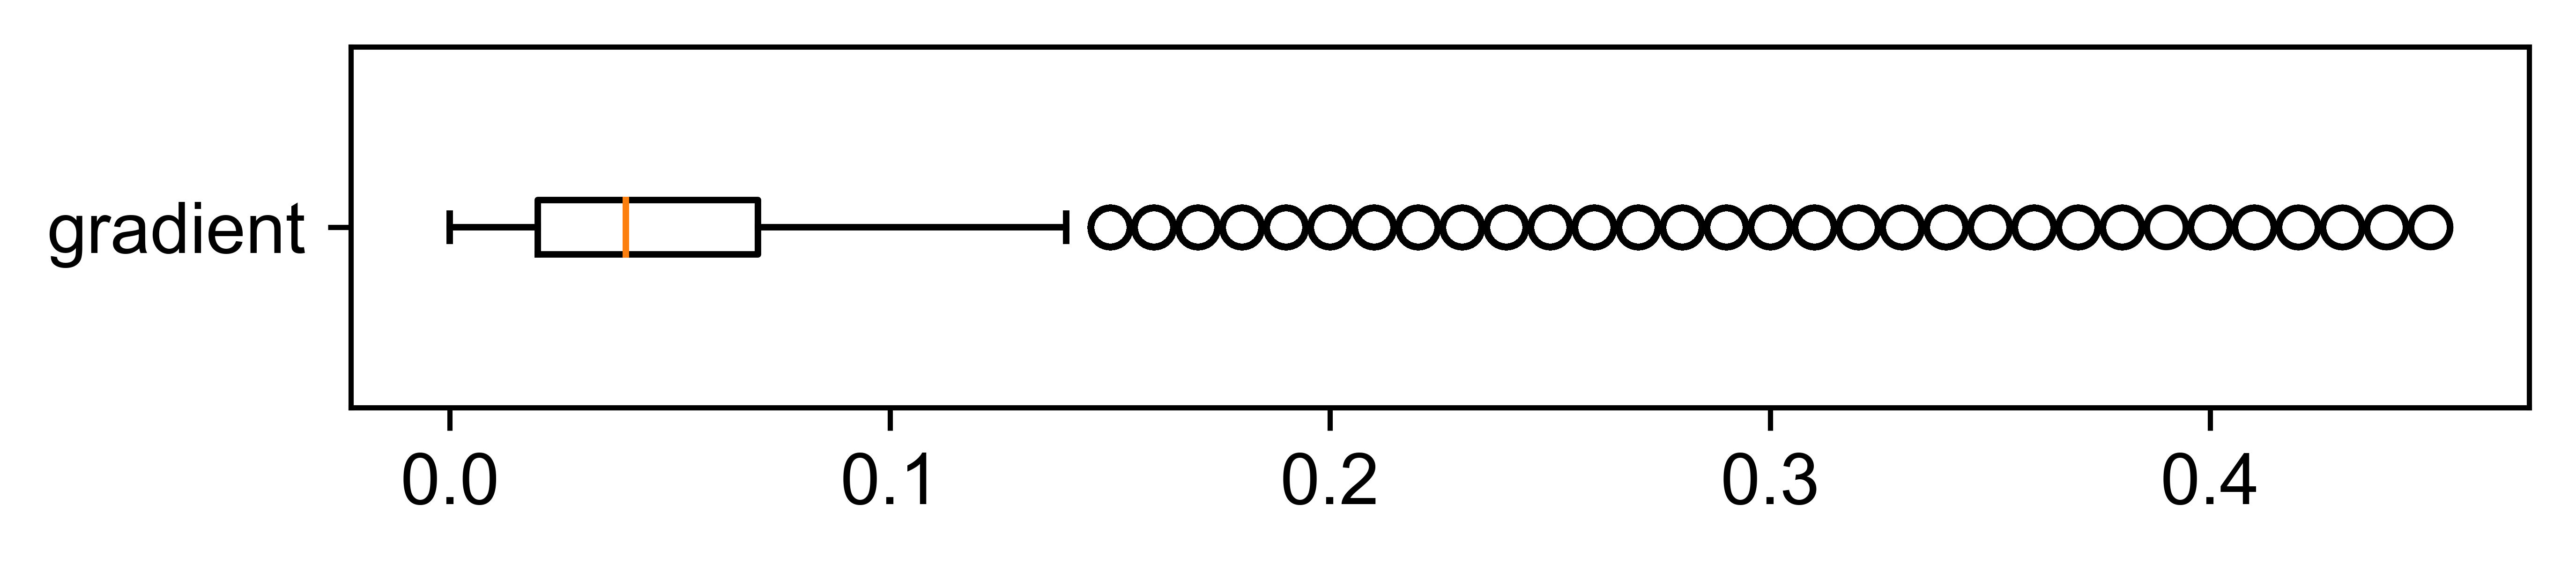

In [21]:
#Boxplot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 1), dpi=1000)
plt.rc('font', family='Arial', size=11)
plt.boxplot(d["elevar"], vert=False)
plt.yticks([1], ['gradient'])
plt.savefig("gradient_boxplot.png", format='png', bbox_inches = 'tight')
plt.savefig("gradient_boxplot.svg", format='svg', bbox_inches = 'tight')
plt.show()

In [23]:
#turn categorical into dummy variables
dummies_Raumtyp = pd.get_dummies(d['Raumtyp'], prefix='Raumtyp').astype(int)
dummies_Raumtyp = dummies_Raumtyp.rename(columns=lambda x: x.replace('Raumtyp', ''))
dummies_Raumtyp.columns = ['Raumtyp' + str(col) for col in dummies_Raumtyp.columns]
d = d.join(dummies_Raumtyp)

dummies_alter_gr = pd.get_dummies(d['alter_gr'], prefix='alter_gr').astype(int)
dummies_alter_gr = dummies_alter_gr.rename(columns=lambda x: x.replace('alter_gr_', ''))
dummies_alter_gr.columns = ['alter_gr_' + str(col) for col in dummies_alter_gr.columns]
d = d.join(dummies_alter_gr)

dummies_P_BIL = pd.get_dummies(d['P_BIL'], prefix='P_BIL').astype(int)
dummies_P_BIL = dummies_P_BIL.rename(columns=lambda x: x.replace('P_BIL_', ''))
dummies_P_BIL.columns = ['P_BIL_' + str(col) for col in dummies_P_BIL.columns]
d = d.join(dummies_P_BIL)

dummies_HP_SEX = pd.get_dummies(d['HP_SEX'], prefix='HP_SEX').astype(int)
dummies_HP_SEX = dummies_HP_SEX.rename(columns=lambda x: x.replace('HP_SEX_', ''))
dummies_HP_SEX.columns = ['HP_SEX_' + str(col) for col in dummies_HP_SEX.columns]
d = d.join(dummies_HP_SEX)

dummies_taet = pd.get_dummies(d['taet'], prefix='taet').astype(int)
dummies_taet = dummies_taet.rename(columns=lambda x: x.replace('taet_', ''))
dummies_taet.columns = ['taet_' + str(col) for col in dummies_taet.columns]
d = d.join(dummies_taet)

dummies_oek_status = pd.get_dummies(d['oek_status'], prefix='oek_status').astype(int)
dummies_oek_status = dummies_oek_status.rename(columns=lambda x: x.replace('oek_status_', ''))
dummies_oek_status.columns = ['oek_status_' + str(col) for col in dummies_oek_status.columns]
d = d.join(dummies_oek_status)

dummies_hhgr_gr2 = pd.get_dummies(d['hhgr_gr2'], prefix='hhgr_gr2').astype(int)
dummies_hhgr_gr2 = dummies_hhgr_gr2.rename(columns=lambda x: x.replace('hhgr_gr2_', ''))
dummies_hhgr_gr2.columns = ['hhgr_gr2_' + str(col) for col in dummies_hhgr_gr2.columns]
d = d.join(dummies_hhgr_gr2)

dummies_P_FKARTE = pd.get_dummies(d['P_FKARTE'], prefix='P_FKARTE').astype(int)
dummies_P_FKARTE = dummies_P_FKARTE.rename(columns=lambda x: x.replace('P_FKARTE', ''))
dummies_P_FKARTE.columns = ['P_FKARTE' + str(col) for col in dummies_P_FKARTE.columns]
d = d.join(dummies_P_FKARTE)

dummies_P_STKFZ = pd.get_dummies(d['P_STKFZ'], prefix='P_STKFZ').astype(int)
dummies_P_STKFZ = dummies_P_STKFZ.rename(columns=lambda x: x.replace('P_STKFZ', ''))
dummies_P_STKFZ.columns = ['P_STKFZ' + str(col) for col in dummies_P_STKFZ.columns]
d = d.join(dummies_P_STKFZ)

# drop the original categorical variables
d = d.drop('Raumtyp', axis=1)
d = d.drop('HP_SEX', axis=1)
d = d.drop('alter_gr', axis=1)
d = d.drop('taet', axis=1)
d = d.drop('P_BIL', axis=1)
d = d.drop('hhgr_gr2', axis=1)
d = d.drop('oek_status', axis=1)
d = d.drop('P_FKARTE', axis=1)
d = d.drop('P_STKFZ', axis=1)

pd.set_option('display.max_columns', None)
#d

In [25]:
# turn vpedrad into binary dichotomous choice variable
d['cbike'] = d['vpedrad'].apply(lambda x: 1 if x in [1, 3] else 0)
d['ebike'] = d['vpedrad'].apply(lambda x: 1 if x in [2, 3] else 0)
#d

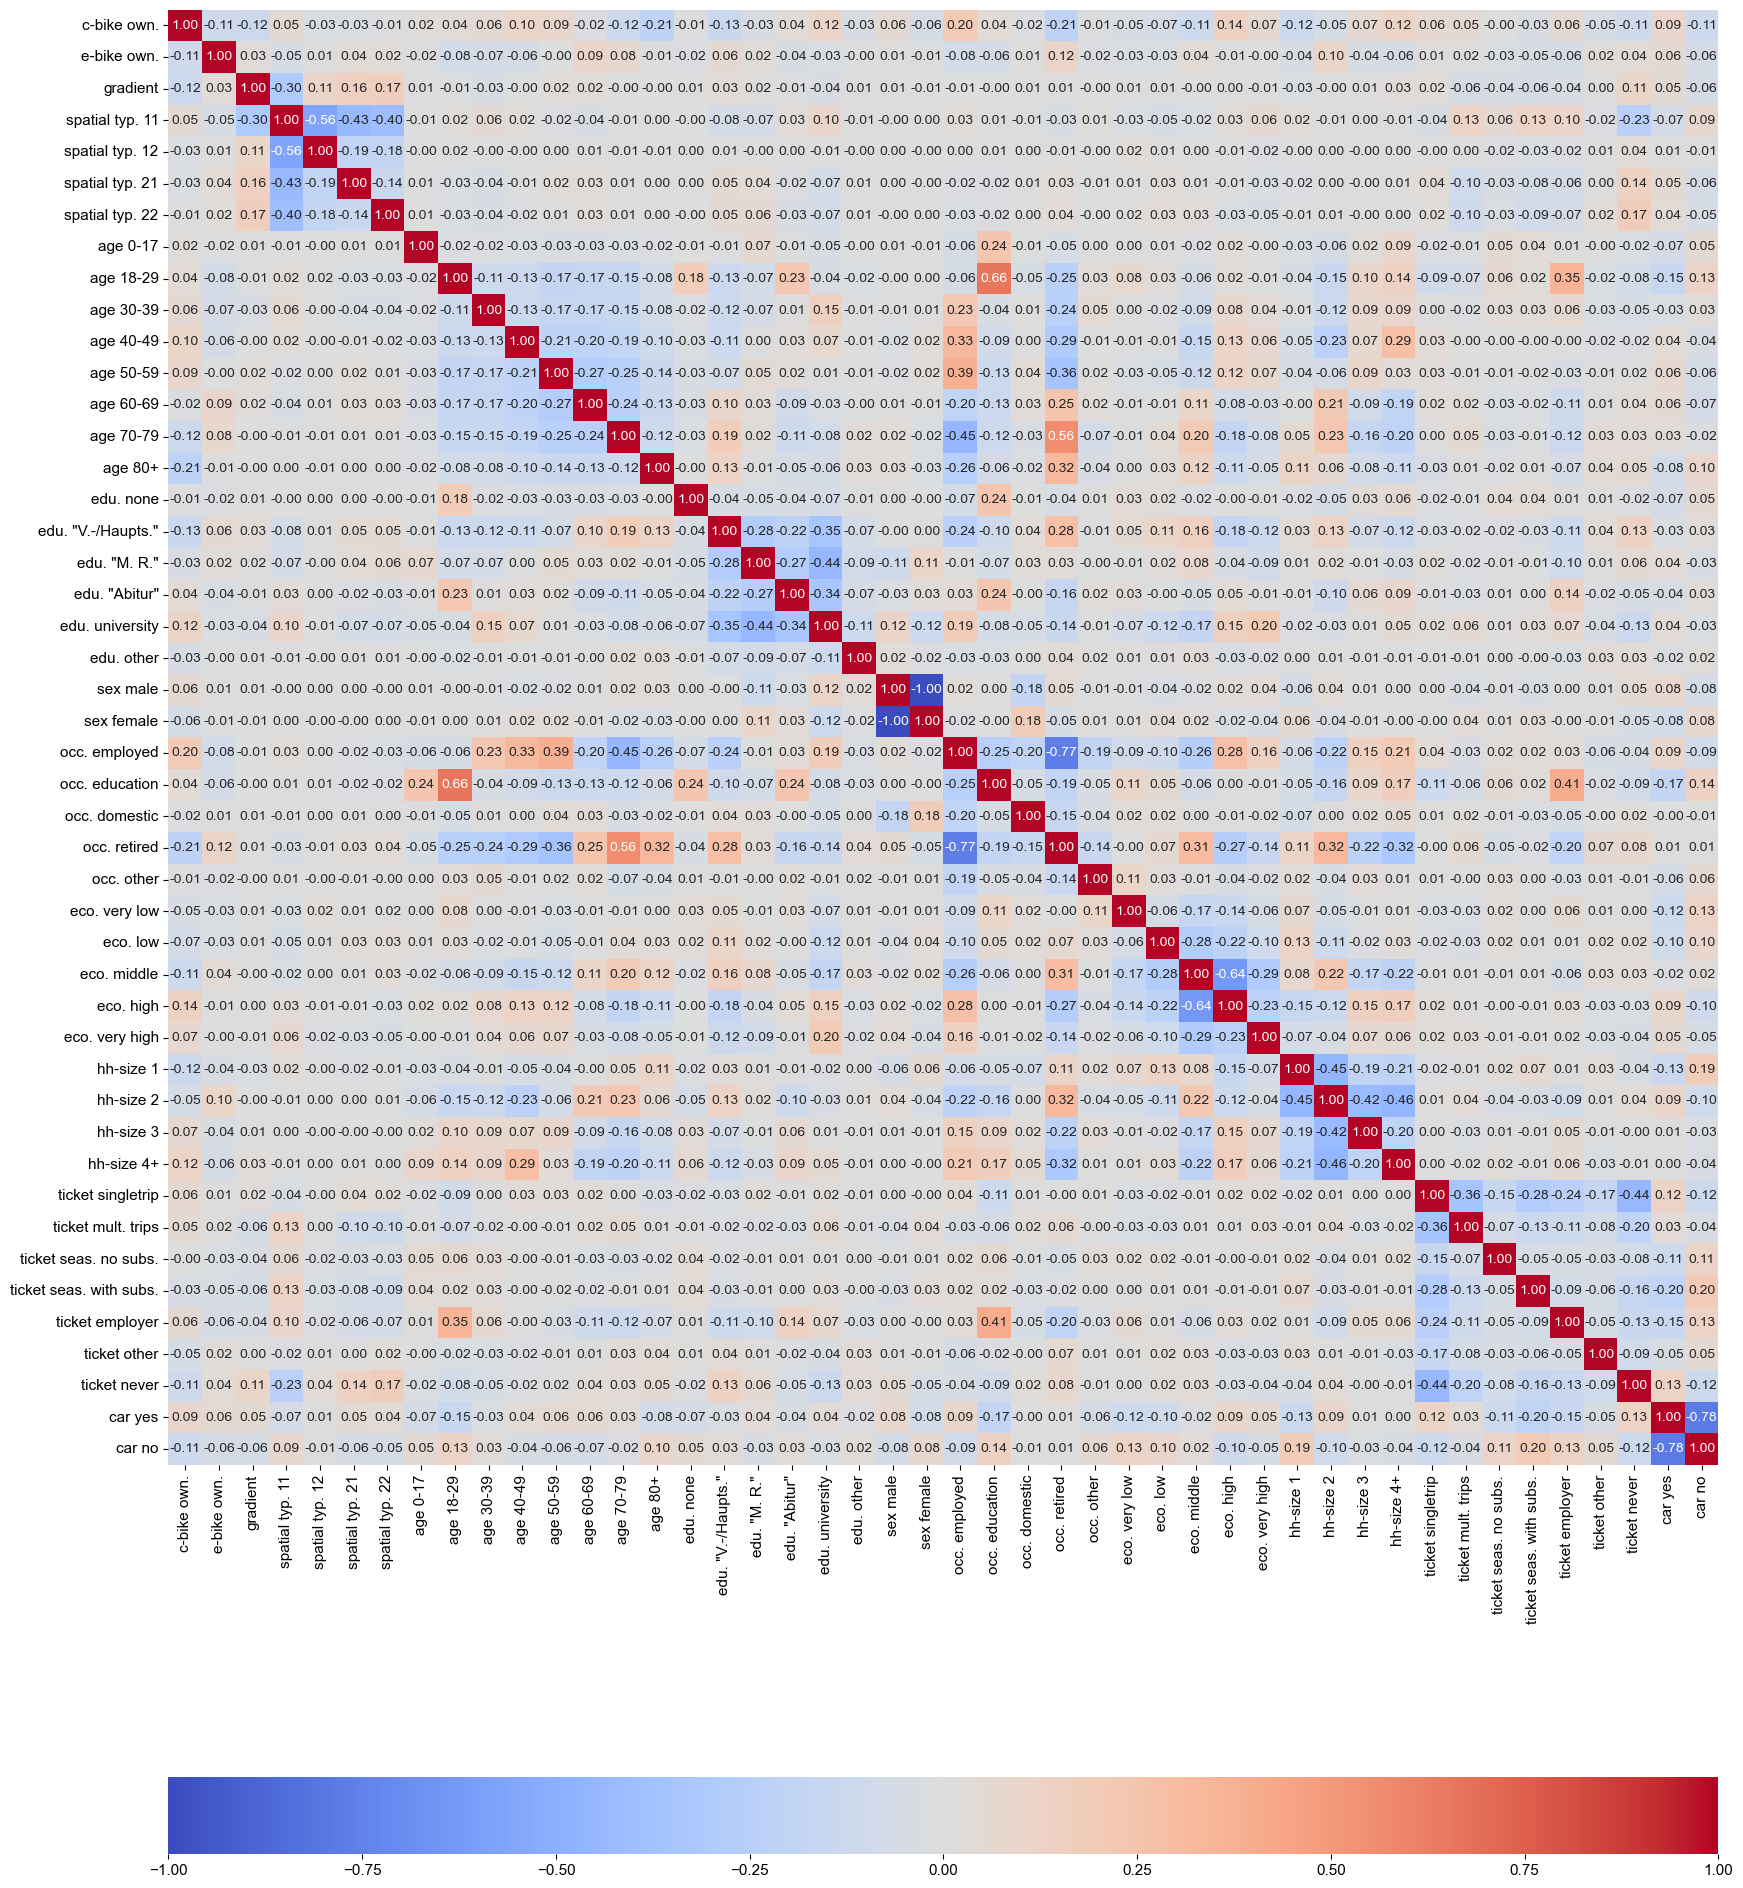

In [27]:
#Correlation matrix between variables
# Calculate the correlation matrix
columns_to_correlate = ['cbike','ebike','elevar','Raumtyp_11','Raumtyp_12','Raumtyp_21','Raumtyp_22','alter_gr_1','alter_gr_2','alter_gr_3','alter_gr_4','alter_gr_5','alter_gr_6','alter_gr_7','alter_gr_8','P_BIL_1','P_BIL_2','P_BIL_3','P_BIL_4','P_BIL_5','P_BIL_6','HP_SEX_1','HP_SEX_2','taet_1','taet_2','taet_3','taet_4','taet_5','oek_status_1','oek_status_2','oek_status_3','oek_status_4','oek_status_5','hhgr_gr2_1','hhgr_gr2_2','hhgr_gr2_3','hhgr_gr2_4','P_FKARTE_1','P_FKARTE_2','P_FKARTE_3','P_FKARTE_4','P_FKARTE_5','P_FKARTE_6','P_FKARTE_7','P_STKFZ_1','P_STKFZ_3']
column_labels = ['c-bike own.','e-bike own.','gradient','spatial typ. 11','spatial typ. 12','spatial typ. 21','spatial typ. 22','age 0-17','age 18-29','age 30-39','age 40-49','age 50-59','age 60-69','age 70-79','age 80+','edu. none','edu. "V.-/Haupts."','edu. "M. R."','edu. "Abitur"','edu. university','edu. other','sex male','sex female','occ. employed','occ. education','occ. domestic','occ. retired','occ. other','eco. very low','eco. low','eco. middle','eco. high','eco. very high','hh-size 1','hh-size 2','hh-size 3','hh-size 4+','ticket singletrip','ticket mult. trips','ticket seas. no subs.','ticket seas. with subs.','ticket employer','ticket other','ticket never','car yes','car no']
correlation_matrix = d[columns_to_correlate].corr()
correlation_matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 27))
plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={"orientation": "horizontal"})

plt.xticks(ticks=[i+0.5 for i in range(len(columns_to_correlate))], labels=column_labels, rotation=90)
plt.yticks(ticks=[i+0.5 for i in range(len(columns_to_correlate))], labels=column_labels, rotation=0)

plt.show()
fig = plot.get_figure()
fig.savefig("correlation_matrix.png", format='png', bbox_inches = 'tight')
fig.savefig("correlation_matrix.svg", format='svg', bbox_inches = 'tight')

In [31]:
# save d
#d.to_csv('D:/Processed Data/DE_ownership_input')
d_10000 = d.sample(n = 10000)
#d_10000.to_csv('D:/Processed Data/DE_ownership_input_10000.csv')
d_30000 = d.sample(n = 30000)
#d_30000.to_csv('D:/Processed Data/DE_ownership_input_30000.csv')

In [ ]:
# descriptive statistics for 30k estimation sample
print(d_30000['Raumtyp'].value_counts(normalize=True))
print(d_30000['oek_status'].value_counts(normalize=True))
print(d_30000['taet'].value_counts(normalize=True))
print(d_30000['hhgr_gr2'].value_counts(normalize=True))
print(d_30000['HP_SEX'].value_counts(normalize=True))
print(d_30000['P_BIL'].value_counts(normalize=True))
print(d_30000['alter_gr'].value_counts(normalize=True))
print(d_30000['vpedrad'].value_counts(normalize=True))

In [35]:
# create plot for spatial distribution of c- and e-bike ownership in NRW (not used in paper)
d = pd.read_csv('D:/Processed Data/NRW_ownership_input.csv')

bikeownership = d.groupby('GITTER_1km')[['cbike', 'ebike']].mean().reset_index()
# Rename columns for clarity
bikeownership = bikeownership.rename(columns={'cbike': 'cbike_share', 'ebike': 'ebike_share'})

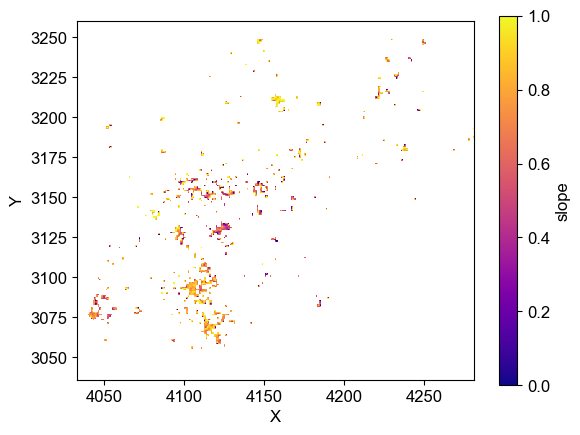

In [37]:
#map cbike 
import matplotlib.pyplot as plt
import pandas as pd

bikeownership['x']='0'
bikeownership['y']='0'

for index, row in bikeownership.iterrows():
    bikeownership.at[index, 'x'] = int(row['GITTER_1km'][9:13])
    bikeownership.at[index, 'y'] = int(row['GITTER_1km'][4:8])
    
bikeownership['x'] = pd.to_numeric(bikeownership['x'])
bikeownership['y'] = pd.to_numeric(bikeownership['y'])

heatmap_data = bikeownership.pivot(index='y', columns='x', values='cbike_share')

# Create the heatmap using imshow
plt.rc('font', family='Arial', size=12)
plt.imshow(heatmap_data, cmap='plasma', origin='lower', extent=[min(bikeownership['x']), max(bikeownership['x']), min(bikeownership['y']), max(bikeownership['y'])])
plt.colorbar(label='slope')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig("cbikeownership_NRW.svg", format='svg')
plt.show()

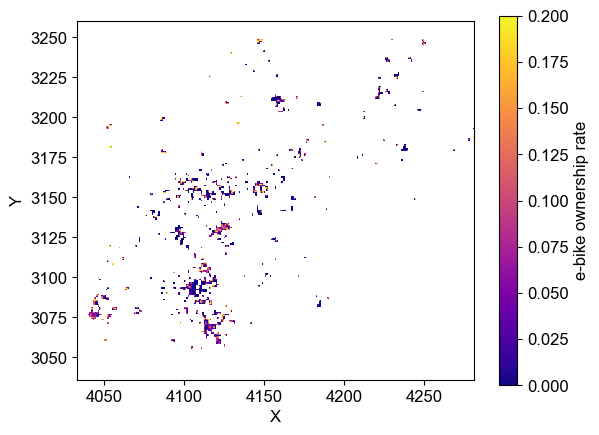

In [38]:
#map ebike 
import matplotlib.pyplot as plt
import pandas as pd

#set values larger than 0.2 to 0.2.
bikeownership['ebike_share'] = bikeownership['ebike_share'].clip(upper=0.2)

bikeownership['x']='0'
bikeownership['y']='0'

for index, row in bikeownership.iterrows():
    bikeownership.at[index, 'x'] = int(row['GITTER_1km'][9:13])
    bikeownership.at[index, 'y'] = int(row['GITTER_1km'][4:8])
    
bikeownership['x'] = pd.to_numeric(bikeownership['x'])
bikeownership['y'] = pd.to_numeric(bikeownership['y'])

heatmap_data = bikeownership.pivot(index='y', columns='x', values='ebike_share')

# Create the heatmap using imshow
plt.rc('font', family='Arial', size=12)
plt.imshow(heatmap_data, cmap='plasma', origin='lower', extent=[min(bikeownership['x']), max(bikeownership['x']), min(bikeownership['y']), max(bikeownership['y'])])
plt.colorbar(label='e-bike ownership rate')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig("ebikeownership_NRW.svg", format='svg')
plt.show()